In [1]:
## Radar Figure Code

In [1]:
## First we need some packages 
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=matplotlib.cbook.MatplotlibDeprecationWarning)
%matplotlib inline
import glob 
from PIL import Image
from siphon.radarserver import RadarServer
from datetime import datetime, timedelta, timezone
from siphon.cdmr import Dataset
import numpy as np
from metpy.plots import ctables

import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

## First, Libraries must be loaded in. 
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, Image, display
import tempfile
import os
import shutil

import pyart
from tint.data_utils import get_nexrad_keys, read_nexrad_key
from tint import Cell_tracks, animate
from tint.visualization import embed_mp4_as_gif

import pyart
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd

import matplotlib.dates as mdates
from matplotlib.dates import date2num, DateFormatter
import datetime as dt
import matplotlib.dates as dates


/var/folders/pc/3868n6_s5wggqvvzx3s5l2p80000gq/T/ipykernel_44752/3135274010.py:4: MatplotlibDeprecationWarning: MatplotlibDeprecationWarning was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.MatplotlibDeprecationWarning)


ModuleNotFoundError: No module named 'siphon'

In [3]:
## Load in our first scan
data1 = pyart.io.read("/apple/s0/kem6245/escape/Radar_Figures/Radar Scans for 6 Panel Figure/KHGX_SDUS64_N0QHGX_202205310508")
data2 = pyart.io.read("/apple/s0/kem6245/escape/Radar_Figures/Radar Scans for 6 Panel Figure/KHGX_SDUS64_N0QHGX_202205310530")
data3 = pyart.io.read("/apple/s0/kem6245/escape/Radar_Figures/Radar Scans for 6 Panel Figure/KHGX_SDUS64_N0QHGX_202205310559")
data4 = pyart.io.read("/apple/s0/kem6245/escape/Radar_Figures/Radar Scans for 6 Panel Figure/KHGX_SDUS64_N0QHGX_202205310630")
data5 = pyart.io.read("/apple/s0/kem6245/escape/Radar_Figures/Radar Scans for 6 Panel Figure/KHGX_SDUS64_N0QHGX_202205310659")
data6 = pyart.io.read("/apple/s0/kem6245/escape/Radar_Figures/Radar Scans for 6 Panel Figure/KHGX_SDUS64_N0QHGX_202205310730")

In [69]:
## File 1

## This information is needed to get the latitude and longitude in the next section
sweep_0=data1.get_slice(0)

## We need to get our lats and lons from the gate information
lat = data1.gate_latitude['data'][sweep_0]
lon = data1.gate_longitude['data'][sweep_0]
gtfilter = pyart.filters.moment_and_texture_based_gate_filter(data1)
gtfilter.exclude_below('signal_to_noise_ratio', 10)

## If you are stuck, you can use the "fields" line of code (look this up again)
ref = data1.fields['reflectivity']['data'][sweep_0]##(gatefilter = gatefilter)
#print(ref[1,2])
#print(ref[2,2])
test = ref[1,2] + ref[2,2]
##print(test)

##from metpy.plots import ctables  # For NWS colortable
##ref_norm, ref_cmap = ctables.registry.get_with_steps('NWSReflectivity', 5, 5)

cm = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
##ref_norm = plt.Normalize(0,40)

In [ ]:
fig = plt.figure(figsize =(10,10) )


## Subplot 1
## Next, we add the projection to the map and add our extent
## Make sure the projection used is consistent across the board
ax = fig.add_subplot(projection = ccrs.PlateCarree())
##ax = ax.axes(projection = crs)
ax.set_extent([-93.5, -96 ,28.0, 30.5])
ax.coastlines()
state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='black', linewidth=1, zorder=3)
    
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
g1.top_labels = False
g1.left_lables = False
g1.xlines = True
g1.ylines = True
g1.xlocator = mticker.FixedLocator([-94, -95, -96])
g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30.5])
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER
g1.xlabel_style = {'size': 16, 'color':'black'}
g1.ylabel_style = {'size': 16, 'color':'black'}

ax.add_feature(ocean, zorder=-1)
ax.add_feature(land, zorder=-1)

ax.set_title("(A) KHGX Initiation Point: 0508 UTC ", fontsize = 24)


## Now, we want to actually plot our data and give it a colorbar and title
mesh=ax.pcolormesh(lon,lat, ref, cmap=cm, norm = ref_norm, zorder=0)
cb2 = plt.colorbar(mesh, location = 'bottom', anchor=(0.65,0.5))
cb2.set_label(r'Radar Reflectivity (dBZ)', size='x-large')

plt.savefig('/apple/s0/kem6245/escape/Radar_Figures/0508 Initiation Point.png')

In [70]:
## File 2
## This information is needed to get the latitude and longitude in the next section
sweep_02=data2.get_slice(0)

## We need to get our lats and lons from the gate information
lat2 = data2.gate_latitude['data'][sweep_02]
lon2 = data2.gate_longitude['data'][sweep_02]

## If you are stuck, you can use the "fields" line of code (look this up again)
ref2 = data2.fields['reflectivity']['data'][sweep_02]
#print(ref[1,2])
#print(ref[2,2])
test2 = ref2[1,2] + ref2[2,2]
##print(test)

ref_cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm2 = plt.Normalize(0,40)

In [71]:
## File 3
## This information is needed to get the latitude and longitude in the next section
sweep_03=data3.get_slice(0)

## We need to get our lats and lons from the gate information
lat3 = data3.gate_latitude['data'][sweep_03]
lon3 = data3.gate_longitude['data'][sweep_03]

## If you are stuck, you can use the "fields" line of code (look this up again)
ref3 = data3.fields['reflectivity']['data'][sweep_03]
#print(ref[1,2])
#print(ref[2,2])
test3 = ref3[1,2] + ref3[2,2]
##print(test)

ref_cmap3 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm3 = plt.Normalize(0,40)

In [72]:
## File 4
## This information is needed to get the latitude and longitude in the next section
sweep_04=data4.get_slice(0)

## We need to get our lats and lons from the gate information
lat4 = data4.gate_latitude['data'][sweep_04]
lon4 = data4.gate_longitude['data'][sweep_04]

## If you are stuck, you can use the "fields" line of code (look this up again)
ref4 = data4.fields['reflectivity']['data'][sweep_04]
#print(ref[1,2])
#print(ref[2,2])
test4 = ref4[1,2] + ref4[2,2]
##print(test)

ref_cmap4 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm4 = plt.Normalize(0,40)

In [73]:
## File 5
## This information is needed to get the latitude and longitude in the next section
sweep_05=data5.get_slice(0)

## We need to get our lats and lons from the gate information
lat5 = data5.gate_latitude['data'][sweep_05]
lon5 = data5.gate_longitude['data'][sweep_05]

## If you are stuck, you can use the "fields" line of code (look this up again)
ref5 = data5.fields['reflectivity']['data'][sweep_05]
#print(ref[1,2])
#print(ref[2,2])
test5 = ref5[1,2] + ref5[2,2]
##print(test)

ref_cmap5 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm5 = plt.Normalize(0,40)

In [74]:
## File 6
## This information is needed to get the latitude and longitude in the next section
sweep_06=data1.get_slice(0)

## We need to get our lats and lons from the gate information
lat6 = data6.gate_latitude['data'][sweep_06]
lon6 = data6.gate_longitude['data'][sweep_06]

## If you are stuck, you can use the "fields" line of code (look this up again)
ref6 = data6.fields['reflectivity']['data'][sweep_06]
#print(ref[1,2])
#print(ref[2,2])
test6 = ref6[1,2] + ref6[2,2]
##print(test)

ref_cmap6 = matplotlib.colors.LinearSegmentedColormap.from_list('', ['skyblue', 'lightslategrey', 'teal', 'lime', 'yellow'])
ref_norm6 = plt.Normalize(0,40)

In [75]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

crs = ccrs.PlateCarree()

def new_map(fig, lon, lat):
    ax = plt.axes(projection = crs)
    ax.set_extent([-93.9, -96.1 ,28.4, 30.6])
    ax.coastlines()
    state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
    ax.add_feature(state_borders, edgecolor='black', linewidth=1, zorder=3)
    
    ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
    land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    
    g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
    g1.top_labels = False
    g1.left_lables = False
    g1.xlines = True
    g1.ylines = True
    g1.xlocator = mticker.FixedLocator([-94, -95, -95.5])
    g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30])
    g1.yformatter = LATITUDE_FORMATTER
    g1.xformatter = LONGITUDE_FORMATTER
    g1.xlabel_style = {'size': 12, 'color':'black'}
    g1.ylabel_style = {'size': 12, 'color':'black'}
    
    ax.add_feature(ocean, zorder=-1)
    ax.add_feature(land, zorder=-1)
    
    return ax

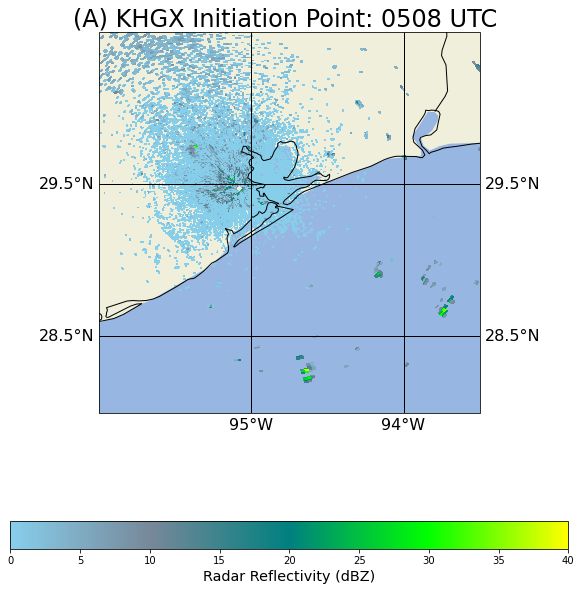

In [80]:
fig = plt.figure(figsize =(10,10) )


## Subplot 1
## Next, we add the projection to the map and add our extent
## Make sure the projection used is consistent across the board
ax = fig.add_subplot(projection = ccrs.PlateCarree())
##ax = ax.axes(projection = crs)
ax.set_extent([-93.5, -96 ,28.0, 30.5])
ax.coastlines()
state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='black', linewidth=1, zorder=3)
    
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
g1.top_labels = False
g1.left_lables = False
g1.xlines = True
g1.ylines = True
g1.xlocator = mticker.FixedLocator([-94, -95, -96])
g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30.5])
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER
g1.xlabel_style = {'size': 16, 'color':'black'}
g1.ylabel_style = {'size': 16, 'color':'black'}

ax.add_feature(ocean, zorder=-1)
ax.add_feature(land, zorder=-1)

ax.set_title("(A) KHGX Initiation Point: 0508 UTC ", fontsize = 24)


## Now, we want to actually plot our data and give it a colorbar and title
mesh=ax.pcolormesh(lon,lat, ref, cmap=cm, norm = ref_norm, zorder=0)
cb2 = plt.colorbar(mesh, location = 'bottom', anchor=(0.65,0.5))
cb2.set_label(r'Radar Reflectivity (dBZ)', size='x-large')

plt.savefig('/apple/s0/kem6245/escape/Radar_Figures/0508 Initiation Point.png')

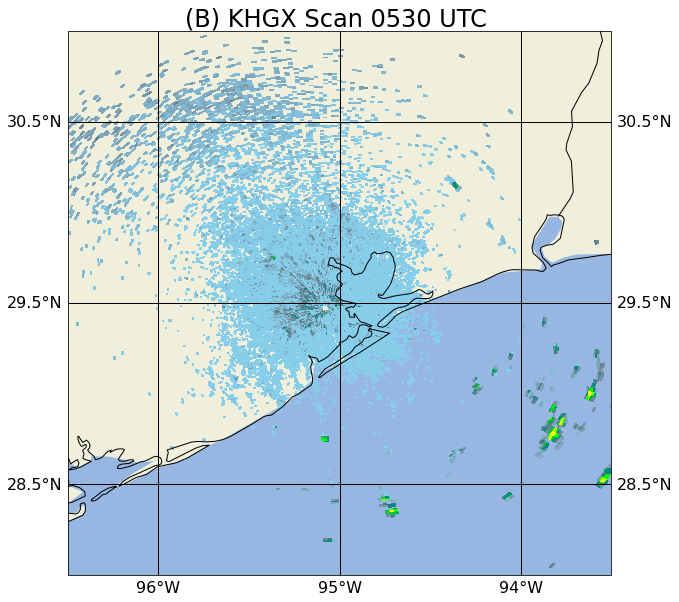

In [21]:
fig = plt.figure(figsize =(10,10) )


## Subplot 1
## Next, we add the projection to the map and add our extent
## Make sure the projection used is consistent across the board
ax = fig.add_subplot(projection = ccrs.PlateCarree())
##ax = ax.axes(projection = crs)
ax.set_extent([-93.5, -96.5 ,28.0, 31])
ax.coastlines()
state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='black', linewidth=1, zorder=3)
    
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
g1.top_labels = False
g1.left_lables = False
g1.xlines = True
g1.ylines = True
g1.xlocator = mticker.FixedLocator([-94, -95, -96])
g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30.5])
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER
g1.xlabel_style = {'size': 16, 'color':'black'}
g1.ylabel_style = {'size': 16, 'color':'black'}

ax.add_feature(ocean, zorder=-1)
ax.add_feature(land, zorder=-1)

ax.set_title("(B) KHGX Scan 0530 UTC ", fontsize = 24)

## Now, we want to actually plot our data and give it a colorbar and title
mesh=ax.pcolormesh(lon2,lat2, ref2, cmap=ref_cmap2,  norm=ref_norm2, zorder=0)
##plt.colorbar(mesh, shrink=0.5, location = 'right', anchor=(0.5,0.5))

plt.savefig('/apple/s0/kem6245/escape/Radar_Figures/0530 Scan.png')

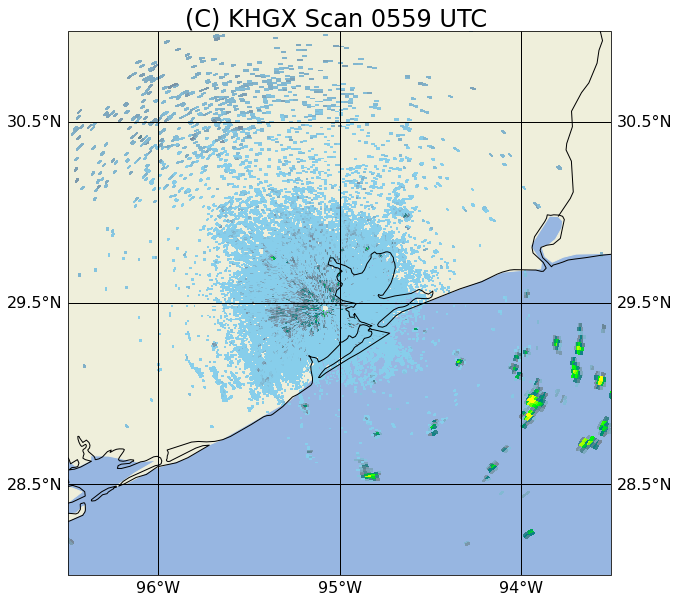

In [22]:
fig = plt.figure(figsize =(10,10) )


## Subplot 1
## Next, we add the projection to the map and add our extent
## Make sure the projection used is consistent across the board
ax = fig.add_subplot(projection = ccrs.PlateCarree())
##ax = ax.axes(projection = crs)
ax.set_extent([-93.5, -96.5 ,28.0, 31])
ax.coastlines()
state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='black', linewidth=1, zorder=3)
    
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
g1.top_labels = False
g1.left_lables = False
g1.xlines = True
g1.ylines = True
g1.xlocator = mticker.FixedLocator([-94, -95, -96])
g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30.5])
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER
g1.xlabel_style = {'size': 16, 'color':'black'}
g1.ylabel_style = {'size': 16, 'color':'black'}

ax.add_feature(ocean, zorder=-1)
ax.add_feature(land, zorder=-1)

ax.set_title("(C) KHGX Scan 0559 UTC ", fontsize = 24)

## Now, we want to actually plot our data and give it a colorbar and title
mesh=ax.pcolormesh(lon3,lat3, ref3, cmap=ref_cmap3,  norm=ref_norm3, zorder=0)
##plt.colorbar(mesh, shrink=0.5, location = 'right', anchor=(0.5,0.5))

plt.savefig('/apple/s0/kem6245/escape/Radar_Figures/0559 Scan.png')

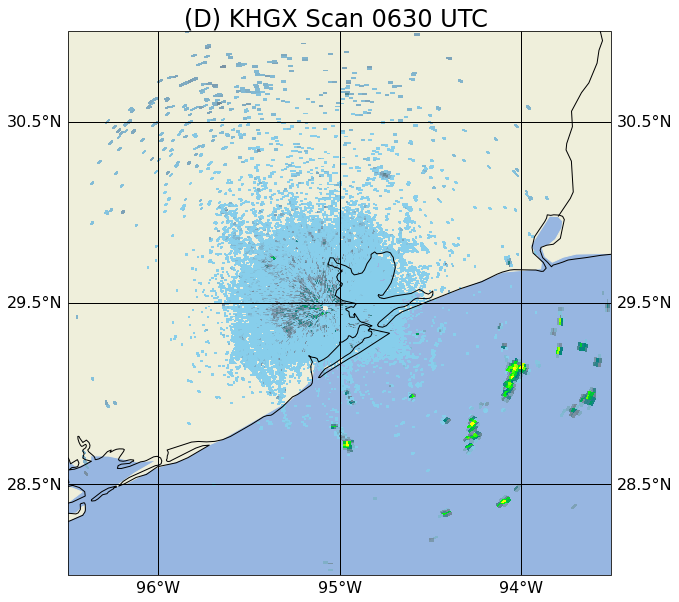

In [23]:
fig = plt.figure(figsize =(10,10) )


## Subplot 1
## Next, we add the projection to the map and add our extent
## Make sure the projection used is consistent across the board
ax = fig.add_subplot(projection = ccrs.PlateCarree())
##ax = ax.axes(projection = crs)
ax.set_extent([-93.5, -96.5 ,28.0, 31])
ax.coastlines()
state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='black', linewidth=1, zorder=3)
    
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
g1.top_labels = False
g1.left_lables = False
g1.xlines = True
g1.ylines = True
g1.xlocator = mticker.FixedLocator([-94, -95, -96])
g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30.5])
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER
g1.xlabel_style = {'size': 16, 'color':'black'}
g1.ylabel_style = {'size': 16, 'color':'black'}

ax.add_feature(ocean, zorder=-1)
ax.add_feature(land, zorder=-1)

ax.set_title("(D) KHGX Scan 0630 UTC ", fontsize = 24)

## Now, we want to actually plot our data and give it a colorbar and title
mesh=ax.pcolormesh(lon4,lat4, ref4, cmap=ref_cmap4,  norm=ref_norm4, zorder=0)
##plt.colorbar(mesh, shrink=0.5, location = 'right', anchor=(0.5,0.5))

plt.savefig('/apple/s0/kem6245/escape/Radar_Figures/0630 Scan.png')

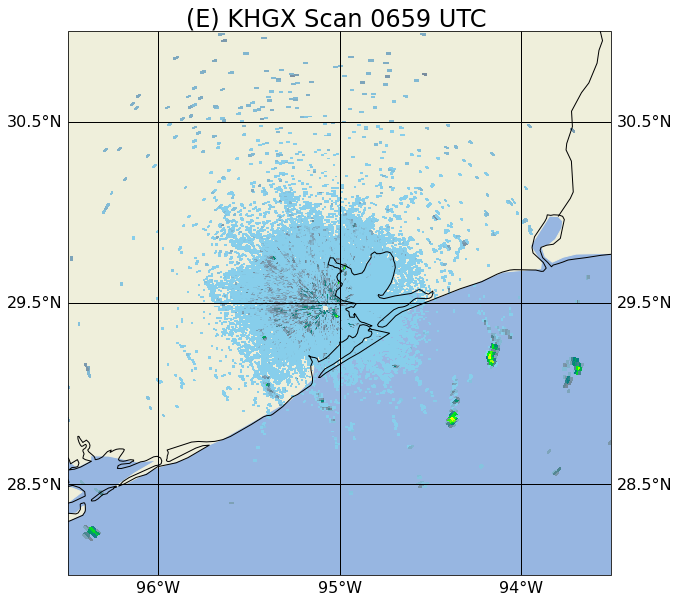

In [24]:
fig = plt.figure(figsize =(10,10) )


## Subplot 1
## Next, we add the projection to the map and add our extent
## Make sure the projection used is consistent across the board
ax = fig.add_subplot(projection = ccrs.PlateCarree())
##ax = ax.axes(projection = crs)
ax.set_extent([-93.5, -96.5 ,28.0, 31])
ax.coastlines()
state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='black', linewidth=1, zorder=3)
    
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
g1.top_labels = False
g1.left_lables = False
g1.xlines = True
g1.ylines = True
g1.xlocator = mticker.FixedLocator([-94, -95, -96])
g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30.5])
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER
g1.xlabel_style = {'size': 16, 'color':'black'}
g1.ylabel_style = {'size': 16, 'color':'black'}

ax.add_feature(ocean, zorder=-1)
ax.add_feature(land, zorder=-1)

ax.set_title("(E) KHGX Scan 0659 UTC ", fontsize = 24)

## Now, we want to actually plot our data and give it a colorbar and title
mesh=ax.pcolormesh(lon5,lat5, ref5, cmap=ref_cmap5,  norm=ref_norm5, zorder=0)
##plt.colorbar(mesh, shrink=0.5, location = 'right', anchor=(0.5,0.5))

plt.savefig('/apple/s0/kem6245/escape/Radar_Figures/0659 Scan.png')

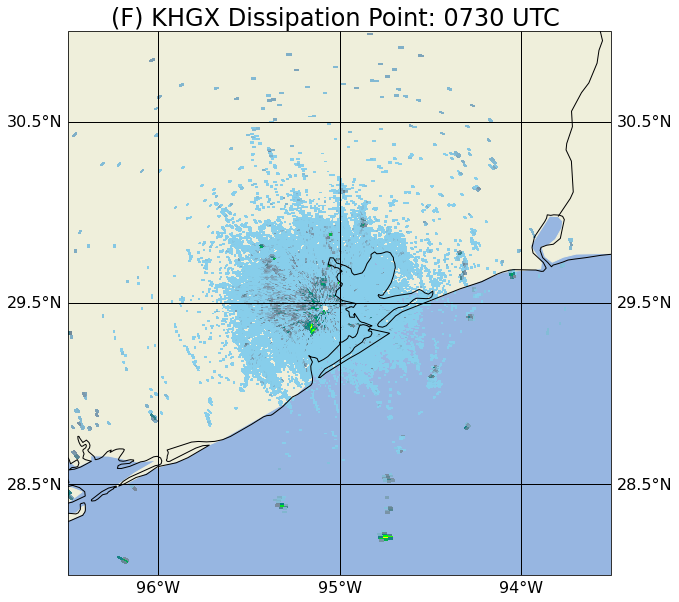

In [27]:
fig = plt.figure(figsize =(10,10) )


## Subplot 1
## Next, we add the projection to the map and add our extent
## Make sure the projection used is consistent across the board
ax = fig.add_subplot(projection = ccrs.PlateCarree())
##ax = ax.axes(projection = crs)
ax.set_extent([-93.5, -96.5 ,28.0, 31])
ax.coastlines()
state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='black', linewidth=1, zorder=3)
    
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
g1.top_labels = False
g1.left_lables = False
g1.xlines = True
g1.ylines = True
g1.xlocator = mticker.FixedLocator([-94, -95, -96])
g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30.5])
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER
g1.xlabel_style = {'size': 16, 'color':'black'}
g1.ylabel_style = {'size': 16, 'color':'black'}

ax.add_feature(ocean, zorder=-1)
ax.add_feature(land, zorder=-1)

ax.set_title("(F) KHGX Dissipation Point: 0730 UTC ", fontsize = 24)

## Now, we want to actually plot our data and give it a colorbar and title
mesh=ax.pcolormesh(lon6,lat6, ref6, cmap=ref_cmap6,  norm=ref_norm6, zorder=0)
##plt.colorbar(mesh, shrink=0.75, location = 'right', anchor=(0.5,0.55))

plt.savefig('/apple/s0/kem6245/escape/Radar_Figures/0730 Scan.png')

In [3]:
## New Radar Figure for Paper 1

data1 = pyart.io.read("/apple/s0/kem6245/escape/Radar_Figures/Radar Scans for 2 Panel/KHGX_SDUS54_N0QHGX_201806271801")
data2 = pyart.io.read("/apple/s0/kem6245/escape/Radar_Figures/Radar Scans for 2 Panel/KHGX_SDUS54_N0QHGX_201906221747")

In [7]:
## File 1

## This information is needed to get the latitude and longitude in the next section
sweep_0=data1.get_slice(0)

## We need to get our lats and lons from the gate information
lat = data1.gate_latitude['data'][sweep_0]
lon = data1.gate_longitude['data'][sweep_0]

## If you are stuck, you can use the "fields" line of code (look this up again)
ref = data1.fields['reflectivity']['data'][sweep_0]
#print(ref[1,2])
#print(ref[2,2])
test = ref[1,2] + ref[2,2]
##print(test)
ref_norm = plt.Normalize(15,65)
##from metpy.plots import ctables  # For NWS colortable
##ref_norm, ref_cmap = ctables.registry.get_with_steps('pyart_HomeyerRainbow', 5,5)

In [8]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

crs = ccrs.PlateCarree()

def new_map(fig, lon, lat):
    ax = plt.axes(projection = crs)
    ax.set_extent([-93.9, -96.1 ,28.4, 30.6])
    ax.coastlines()
    state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
    ax.add_feature(state_borders, edgecolor='black', linewidth=1, zorder=3)
    
    ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
    land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    
    g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
    g1.top_labels = False
    g1.left_lables = False
    g1.xlines = True
    g1.ylines = True
    g1.xlocator = mticker.FixedLocator([-94, -95, -96])
    g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30.5])
    g1.yformatter = LATITUDE_FORMATTER
    g1.xformatter = LONGITUDE_FORMATTER
    g1.xlabel_style = {'size': 12, 'color':'black'}
    g1.ylabel_style = {'size': 12, 'color':'black'}
    
    ax.add_feature(ocean, zorder=-1)
    ax.add_feature(land, zorder=-1)
    
    return ax

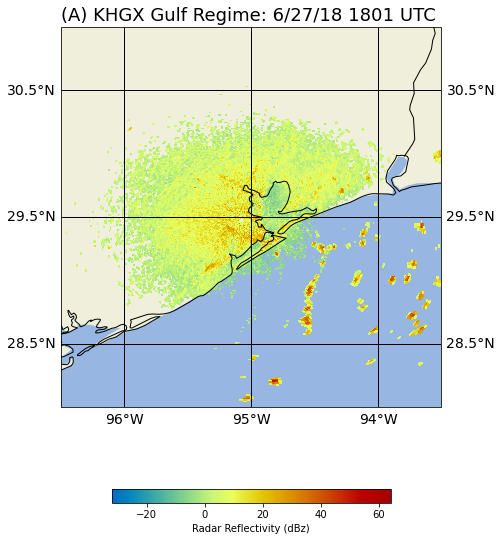

In [35]:
fig = plt.figure(figsize =(10,10) )


## Subplot 1
## Next, we add the projection to the map and add our extent
## Make sure the projection used is consistent across the board
ax = fig.add_subplot(projection = ccrs.PlateCarree())
##ax = ax.axes(projection = crs)
ax.set_extent([-93.5, -96.5 ,28.0, 31])
ax.coastlines()
state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='black', linewidth=1, zorder=3)
    
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
g1.top_labels = False
g1.left_lables = False
g1.xlines = True
g1.ylines = True
g1.xlocator = mticker.FixedLocator([-94, -95, -96])
g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30.5])
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER
g1.xlabel_style = {'size': 14, 'color':'black'}
g1.ylabel_style = {'size': 14, 'color':'black'}

ax.add_feature(ocean, zorder=-1)
ax.add_feature(land, zorder=-1)

ax.set_title("(A) KHGX Gulf Regime: 6/27/18 1801 UTC ", fontsize = 18)


## Now, we want to actually plot our data and give it a colorbar and title
mesh=ax.pcolormesh(lon,lat, ref, vmin=-32, vmax=64.0, cmap="pyart_HomeyerRainbow")
plt.colorbar(mesh, shrink=0.5, location = 'bottom', label='Radar Reflectivity (dBz)')

plt.savefig('/apple/s0/kem6245/escape/Radar_Figures/Gulf Example')

In [17]:
## Repeat the Same Process for Land Convection

## File 2
## This information is needed to get the latitude and longitude in the next section
sweep_02=data2.get_slice(0)

## We need to get our lats and lons from the gate information
lat2 = data2.gate_latitude['data'][sweep_02]
lon2 = data2.gate_longitude['data'][sweep_02]

## If you are stuck, you can use the "fields" line of code (look this up again)
ref2 = data2.fields['reflectivity']['data'][sweep_02]
#print(ref[1,2])
#print(ref[2,2])
test2 = ref2[1,2] + ref2[2,2]
##print(test)


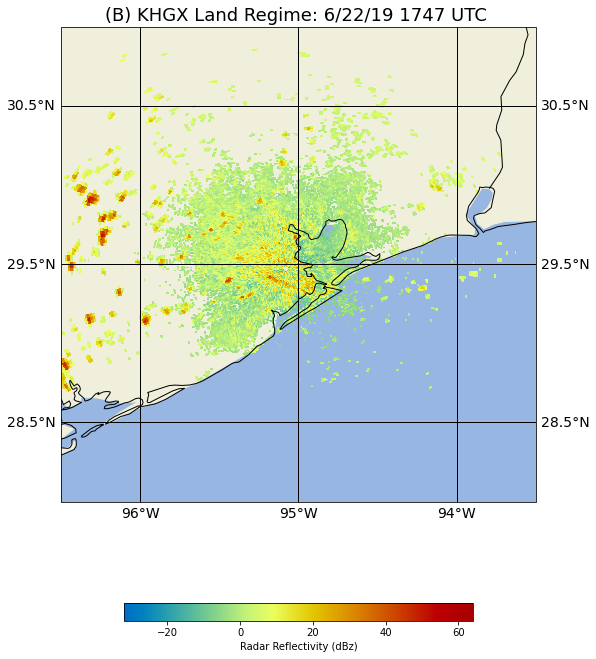

In [36]:
fig = plt.figure(figsize =(10,10) )

## Next, we add the projection to the map and add our extent
## Make sure the projection used is consistent across the board
ax = fig.add_subplot(projection = ccrs.PlateCarree())
##ax = ax.axes(projection = crs)
ax.set_extent([-93.5, -96.5 ,28.0, 31])
ax.coastlines()
state_borders = cartopy.feature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lines', scale='50m', facecolor='none')
ax.add_feature(state_borders, edgecolor='black', linewidth=1, zorder=3)
    
ocean = cartopy.feature.NaturalEarthFeature('physical', 'ocean', scale='50m',edgecolor='face',facecolor=cartopy.feature.COLORS['water'])
land = cartopy.feature.NaturalEarthFeature('physical', 'land', scale='50m', edgecolor='face',facecolor=cartopy.feature.COLORS['land'])
    
g1 = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth =1, color = 'black')
g1.top_labels = False
g1.left_lables = False
g1.xlines = True
g1.ylines = True
g1.xlocator = mticker.FixedLocator([-94, -95, -96])
g1.ylocator = mticker.FixedLocator([28.5, 29.5, 30.5])
g1.yformatter = LATITUDE_FORMATTER
g1.xformatter = LONGITUDE_FORMATTER
g1.xlabel_style = {'size': 14, 'color':'black'}
g1.ylabel_style = {'size': 14, 'color':'black'}

ax.add_feature(ocean, zorder=-1)
ax.add_feature(land, zorder=-1)

ax.set_title("(B) KHGX Land Regime: 6/22/19 1747 UTC ", fontsize = 18)

## Now, we want to actually plot our data and give it a colorbar and title
mesh=ax.pcolormesh(lon2,lat2, ref2, vmin=-32, vmax=64.0, cmap="pyart_HomeyerRainbow")
plt.colorbar(mesh, shrink=0.5, location = 'bottom', label='Radar Reflectivity (dBz)')
plt.tight_layout()

plt.savefig('/apple/s0/kem6245/escape/Radar_Figures/Land Example.png')